#**Forest_fire_area_prediction**

In [31]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Importing the dataset
df_forest = pd.read_csv("forestfires.csv")
df_forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# Shape of the dataset
print ("The shape of the dataset : ", df_forest.shape)

The shape of the dataset :  (517, 13)


##**Exploratory Data Analysis**

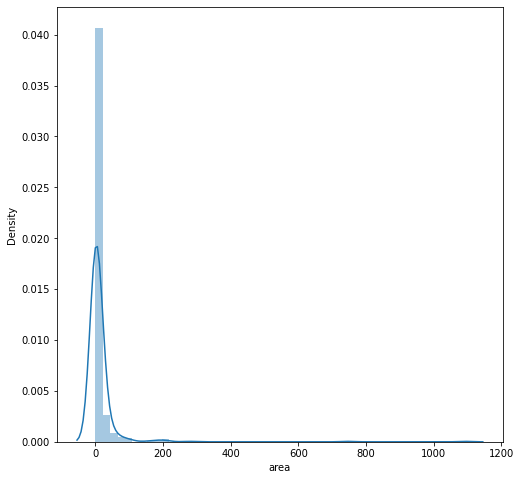

In [4]:
# Skewness of the Area in the dataset
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(df_forest['area'])

In [5]:
# Reducing the Right Skewness of the Area using log(n) + 1
df_forest['u_area'] = np.log(df_forest['area'] + 1)

####**Skewed and Unskewed Area Distribution**

[Text(0, 0.5, 'Density'),
 Text(0.5, 0, 'U_Area'),
 Text(0.5, 1.0, 'Reduced Skewness of Area Distribution')]

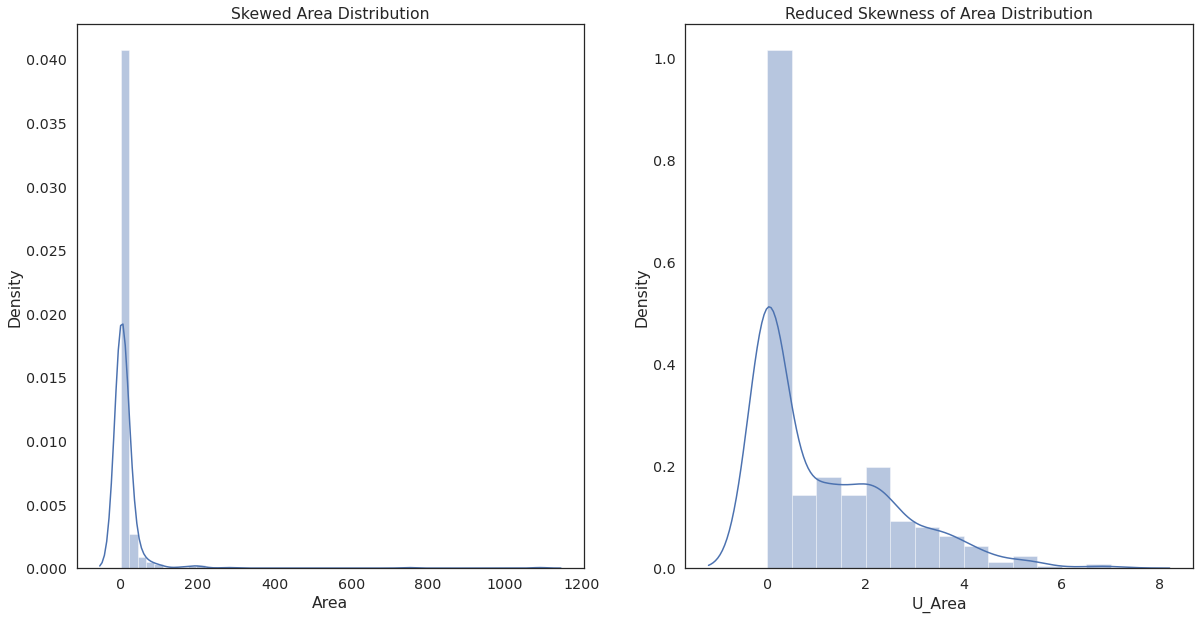

In [6]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = 'white', font_scale = 1.3)
fig, ax = plt.subplots(1,2)

# Distribution Plots
area_dist = sns.distplot(df_forest['area'], ax = ax[0]);
area_dist_2 = sns.distplot(df_forest['u_area'], ax = ax[1]);
area_dist.set(title = "Skewed Area Distribution", xlabel = "Area", ylabel = "Density")
area_dist_2.set(title = "Reduced Skewness of Area Distribution", xlabel = "U_Area", ylabel = "Density")

In [7]:
# check null values if any
df_forest.isna().sum()

X         0
Y         0
month     0
day       0
FFMC      0
DMC       0
DC        0
ISI       0
temp      0
RH        0
wind      0
rain      0
area      0
u_area    0
dtype: int64

In [8]:
df_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
 13  u_area  517 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 56.7+ KB


####**Numerical and Categorical data**

In [9]:
# describe categorical features
df_forest.describe(include="O")

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [10]:
df_forest.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

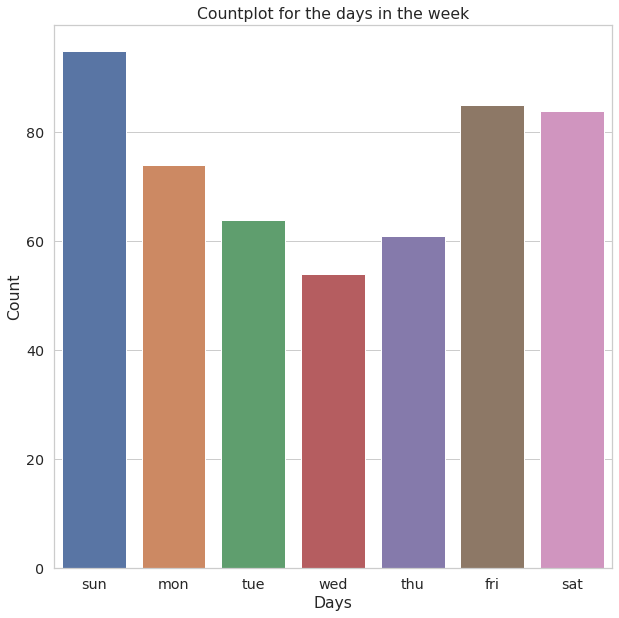

In [11]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(df_forest['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'])
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count');

In [12]:
#describe numerical features
df_forest.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00000,7.000000,9.00000
Y,517.0,4.299807,1.229900,2.0,4.0,4.00000,5.000000,9.00000
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60000,92.900000,96.20000
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30000,142.400000,291.30000
DC,517.0,547.940039,248.066192,7.9,437.7,664.20000,713.900000,860.60000
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40000,10.800000,56.10000
temp,517.0,18.889168,5.806625,2.2,15.5,19.30000,22.800000,33.30000
RH,517.0,44.288201,16.317469,15.0,33.0,42.00000,53.000000,100.00000
wind,517.0,4.017602,1.791653,0.4,2.7,4.00000,4.900000,9.40000
rain,517.0,0.021663,0.295959,0.0,0.0,0.00000,0.000000,6.40000


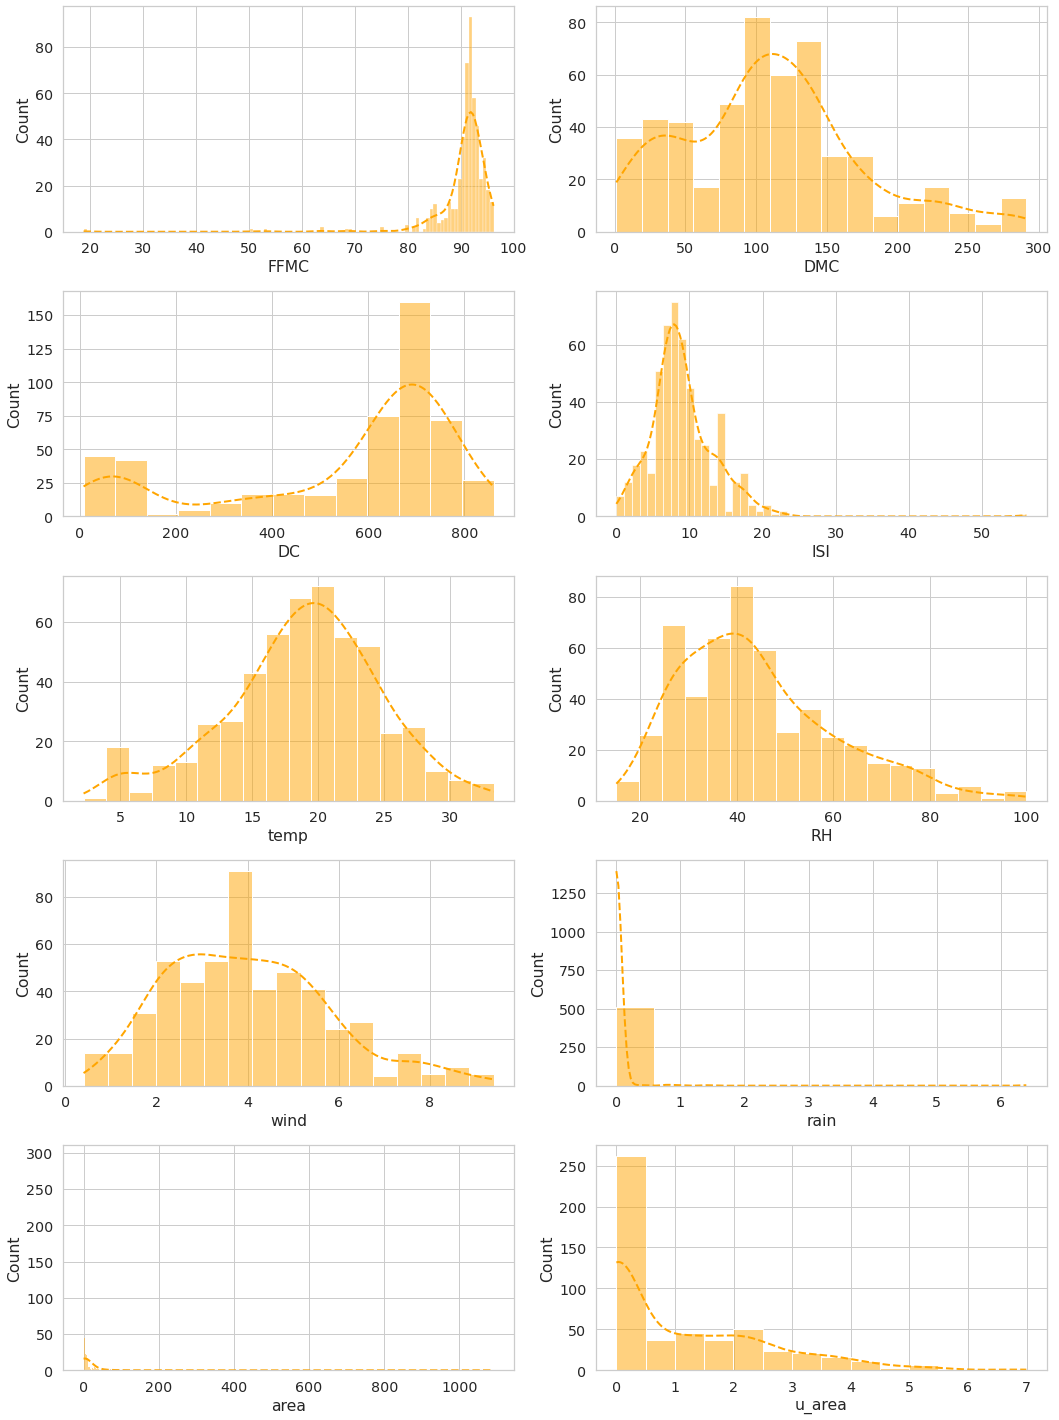

In [13]:
# visualize distribution of all numerical columns

num_cols = df_forest.select_dtypes(include='number').columns

fig, axs =  plt.subplots(nrows=5, ncols=2, figsize=(15,20))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[2:]):
    plt.sca(axs[i])
    sns.histplot(data=df_forest, x=col, kde=True, line_kws={'linewidth':2, 'linestyle':'--'}, color='orange')
    
plt.tight_layout()
plt.show()

[Text(0, 0.5, 'Area'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Scatter Plot of Area and Temperature')]

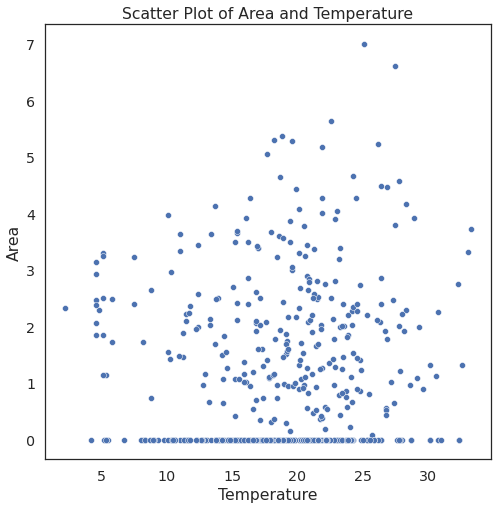

In [14]:
# After Reducing the Skewness
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df_forest['temp'], df_forest['u_area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area")

####**Correlation Heatmap**

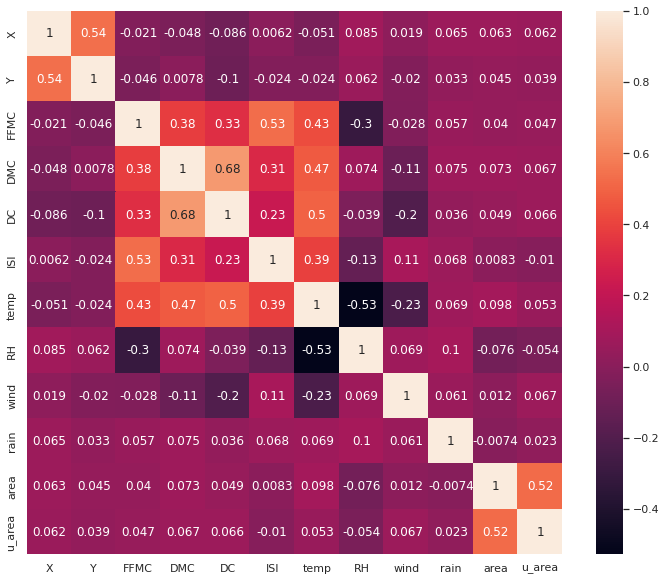

In [15]:
# Correlation Heatmap of the features in the dataset
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(df_forest.corr(), annot = True)

##**Preprocessing**

In [16]:
# Reducing the skewness for the final training and dropping u_area
df_forest['area'] = np.log(df_forest['area'] + 1)
df_forest.drop(columns = 'u_area', inplace = True)

display(df_forest)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [17]:
# Normalization of the features
st = StandardScaler()

# FFMC, DMC, DC, ISI, RH
df_forest['FFMC'] = st.fit_transform(np.array(df_forest['FFMC']).reshape(-1, 1))
df_forest['DMC'] =st.fit_transform(np.array(df_forest['DMC']).reshape(-1, 1))
df_forest['DC'] = st.fit_transform(np.array(df_forest['DC']).reshape(-1, 1))
df_forest['ISI'] =st.fit_transform(np.array(df_forest['ISI']).reshape(-1, 1))
df_forest['RH'] = st.fit_transform(np.array(df_forest['RH']).reshape(-1, 1))

In [18]:
# Changing categorical values into numerical values

# Months
df_forest['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                           'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},
                           inplace = True)

# Days
df_forest['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)

df_forest.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,-0.805959,-1.323326,-1.830477,-0.860946,8.2,0.411724,6.7,0.0,0.0
1,7,4,10,3,-0.008102,-1.179541,0.488891,-0.509688,18.0,-0.692456,0.9,0.0,0.0
2,7,4,10,7,-0.008102,-1.049822,0.560715,-0.509688,14.6,-0.692456,1.3,0.0,0.0
3,8,6,3,6,0.191362,-1.212361,-1.898266,-0.004756,8.3,3.233519,4.0,0.2,0.0
4,8,6,3,1,-0.243833,-0.931043,-1.798600,0.126966,11.4,3.356206,1.8,0.0,0.0
5,8,6,8,1,0.300161,-0.399665,-0.241863,1.246598,22.2,-0.937830,5.4,0.0,0.0
6,8,6,8,2,0.300161,-0.343401,-0.211197,-0.114524,24.1,-1.060516,3.1,0.0,0.0
7,8,6,8,2,0.155096,0.539625,0.243154,0.368455,8.0,2.558742,2.2,0.0,0.0
8,8,6,9,3,0.064430,0.291128,0.583715,-0.443828,13.1,1.147845,5.4,0.0,0.0
9,7,5,9,7,0.336427,-0.357467,0.607926,-0.421874,22.8,-0.263053,4.0,0.0,0.0


##**Splitting the dataset into training and testing**

In [19]:
target = df_forest['area']
features = df_forest.drop(columns = 'area')
#features.drop(['day','X','Y'], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.15, random_state = 50)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (439, 12)
Test data set size :  (78, 12)


In [20]:
X_train.head()
#y_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
514,7,4,8,1,-1.640083,-0.846648,0.474768,-1.563460,21.2,1.577248,6.7,0.0
46,5,6,9,2,0.046297,0.244241,0.559101,-0.443828,14.7,1.577248,3.6,0.0
148,2,2,8,3,0.753489,-0.040203,0.400119,1.751531,17.4,-0.079023,6.7,0.0
248,8,6,8,4,0.445226,0.725608,0.479207,0.983155,28.7,-0.999173,2.7,0.0
268,3,4,8,3,0.263895,0.652153,0.444908,1.158784,21.0,-0.753800,3.1,0.0


##**Machine Learning Models**

#### Linear Regression

In [21]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions))

Mean Squared Error :  1.8593964602171809


#### Polynomial Regression

In [22]:
# Transforming data
for i in range(2,8):
  poly = PolynomialFeatures(i)
  poly_X_train = poly.fit_transform(X_train)
  poly_X_test = poly.fit_transform(X_test)

  model_2 = LinearRegression()
  model_2.fit(poly_X_train, y_train)

  # Predictions
  predictions_poly = model_2.predict(poly_X_test)

  # Scores
  print ("Mean Squared Error : ", mean_squared_error(y_test, predictions_poly))

Mean Squared Error :  2.4192056868397276
Mean Squared Error :  332.85875626726823
Mean Squared Error :  350.0717342551891
Mean Squared Error :  220.61578425160877
Mean Squared Error :  120033659438.99382
Mean Squared Error :  239.0941029064894


#### Lasso Regression

In [23]:
# Lasso regression
model_3 = Lasso(alpha = 1.0, max_iter = 10000) 
model_3.fit(X_train, y_train)

# Predictions
prediction = model_3.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))

Mean Squared Error :  1.7592891759486855


#### Ridge Regression

In [29]:
# Ridge Regression
model_4 = Ridge(alpha = 10.0)
model_4.fit(X_train, y_train)

# Predictions
pred = model_4.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred))

Mean Squared Error :  1.8514863594694155


#### SVR

In [30]:
# SVR
model_6 = SVR( kernel = 'linear')
model_6.fit(X_train, y_train)

# Predictions
prediction = model_6.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))

Mean Squared Error :  2.2425332748550457


In [26]:
prediction = np.exp(prediction - 1)
prediction

array([0.55767658, 0.74647156, 0.72909359, 1.07937583, 0.50223772,
       0.68410897, 0.6984228 , 0.66918926, 0.8624326 , 0.63671216,
       2.63590263, 0.77558126, 0.60175988, 0.43806592, 0.62321252,
       0.70784035, 0.31541995, 1.07974358, 0.47547798, 0.60426394,
       0.47925573, 0.77138235, 0.60086916, 0.74559133, 1.18622687,
       0.66704245, 0.63144342, 0.31429794, 0.60175988, 0.44776734,
       0.59800434, 0.75012178, 0.86379916, 0.45278209, 0.63237289,
       0.49699395, 0.5972645 , 0.50774747, 0.49252051, 0.94491689,
       0.50749673, 0.77174975, 0.42491529, 0.52472812, 0.3800343 ,
       0.84262547, 0.96945653, 1.08468817, 0.5923792 , 0.80387979,
       0.65983822, 0.61846258, 0.65712672, 0.89329115, 0.52944827,
       0.34199146, 0.49982779, 1.04735739, 0.62661408, 0.67613978,
       0.63976051, 0.90543644, 0.41923708, 0.42134425, 0.64079214,
       0.6401586 , 0.67559894, 0.61764797, 0.55283686, 0.54502671,
       0.43342698, 0.71618659, 0.50873754, 0.64156697, 0.57131